In [1]:
import numpy as np 
import pandas as pd 
import re
import torch
import torch.nn as nn

In [2]:
df = pd.read_csv("UpdatedResumeDataSet.csv")
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [3]:
df["Category"].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [4]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [6]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def cleaningText(text):
    text = re.sub(r'<.*?>', '', text) 
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'@[A-Za-z0-9]', '', text)
    text = re.sub(r'#[A-Za-z0-9]', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    text = text.replace('\n', ' ') 
    text = text.replace('/', ' ') 
    text = text.replace(',', ' ') 

    text = text.translate(str.maketrans('', '', string.punctuation)) 
    text = text.strip(' ') 
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('english'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def toSentence(list_words): 
    sentence = ' '.join(word for word in list_words)
    return sentence

In [7]:
df['text_clean'] = df['Resume'].apply(cleaningText)
df['text_casefoldingText'] = df['text_clean'].apply(casefoldingText)
df['text_tokenizingText'] = df['text_casefoldingText'].apply(tokenizingText)
df['text_stopword'] = df['text_tokenizingText'].apply(filteringText)
df['text_akhir'] = df['text_stopword'].apply(toSentence)

In [8]:
df

,Category,Resume,text_clean,text_casefoldingText,text_tokenizingText,text_stopword,text_akhir
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas...,skills programming languages python pandas...,"[skills, programming, languages, python, panda...","[skills, programming, languages, python, panda...",skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May to May B E ...,education details may to may b e ...,"[education, details, may, to, may, b, e, uit, ...","[education, details, may, may, b, e, uit, rgpv...",education details may may b e uit rgpv data sc...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control Syste...,areas of interest deep learning control syste...,"[areas, of, interest, deep, learning, control,...","[areas, interest, deep, learning, control, sys...",areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Table...,skills r python sap hana table...,"[skills, r, python, sap, hana, tableau, sap, h...","[skills, r, python, sap, hana, tableau, sap, h...",skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad...,education details mca ymcaust faridabad...,"[education, details, mca, ymcaust, faridabad, ...","[education, details, mca, ymcaust, faridabad, ...",education details mca ymcaust faridabad haryan...
...,...,...,...,...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office ...,computer skills proficient in ms office ...,"[computer, skills, proficient, in, ms, office,...","[computer, skills, proficient, ms, office, wor...",computer skills proficient ms office word basi...
958,Testing,â Willingness to accept the challenges. â ...,Willingness to accept the challenges Posi...,willingness to accept the challenges posi...,"[willingness, to, accept, the, challenges, pos...","[willingness, accept, challenges, positive, th...",willingness accept challenges positive thinkin...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerne...,personal skills quick learner eagerne...,"[personal, skills, quick, learner, eagerness, ...","[personal, skills, quick, learner, eagerness, ...",personal skills quick learner eagerness learn ...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power ...,computer skills software knowledge ms power ...,"[computer, skills, software, knowledge, ms, po...","[computer, skills, software, knowledge, ms, po...",computer skills software knowledge ms power po...


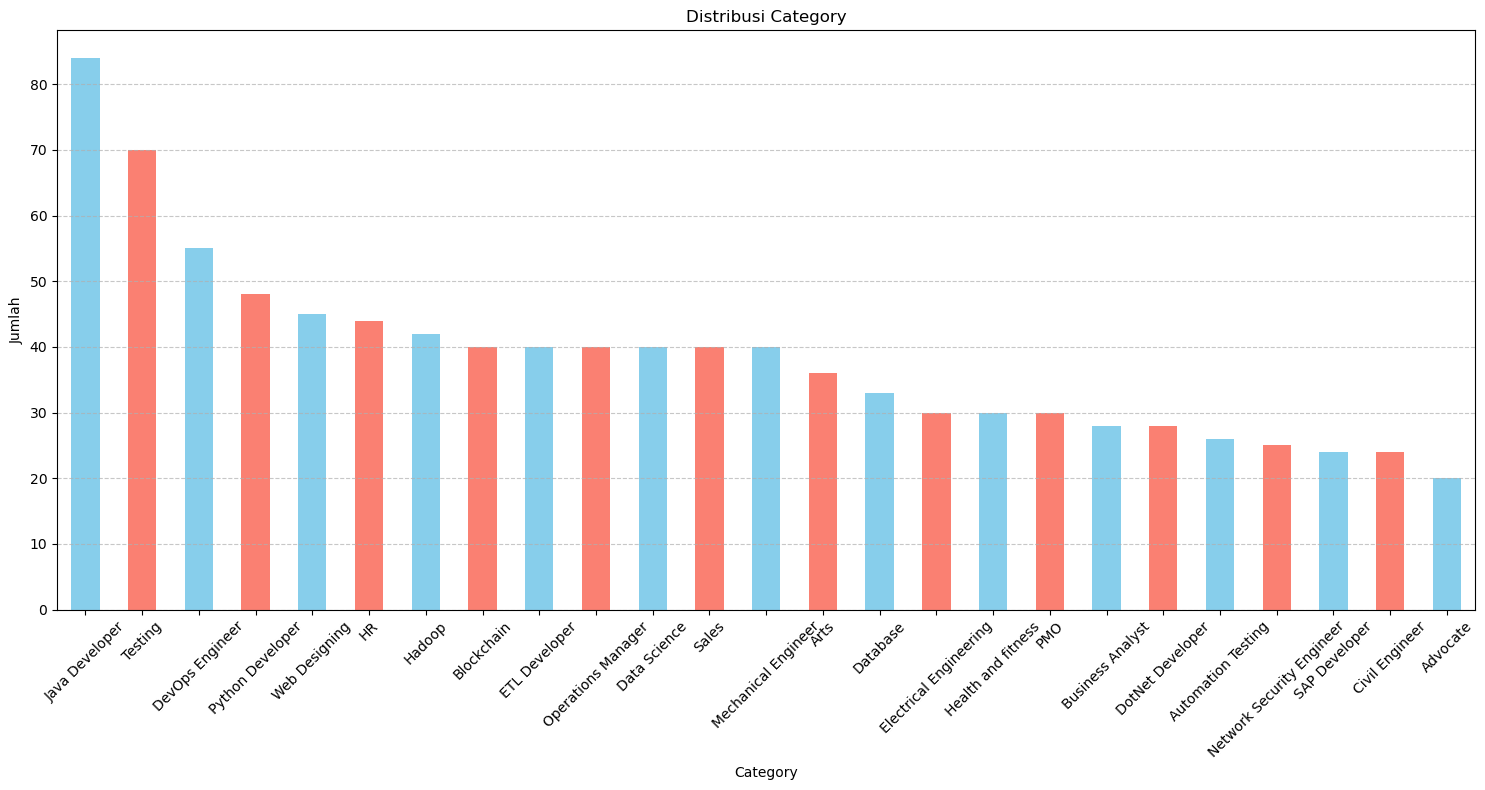

In [9]:
import matplotlib.pyplot as plt

polarity_counts = df['Category'].value_counts()

plt.figure(figsize=(15, 8))
polarity_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Category')
plt.xlabel('Category')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing

texts = df['text_akhir'].astype(str).tolist()
categories = df['Category'].tolist()

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(categories)  

X_train_texts, X_test_texts, y_train_labels, y_test_labels = train_test_split(
    texts, labels, test_size=0.2, stratify=labels, random_state=42
)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight

# ========== 1. Data Preprocessing (Tokenization + Padding) ==========
max_vocab = 20000 
max_len = 200

# Tokenizer untuk teks
tokenizer = Tokenizer(num_words=max_vocab, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_texts)

# Ubah teks menjadi sequence integer
X_train_seq = tokenizer.texts_to_sequences(X_train_texts)
X_test_seq = tokenizer.texts_to_sequences(X_test_texts)

# Padding sequence agar panjangnya sama
X_train = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# # ========== 2. Label Encoding ==========
y_train = to_categorical(y_train_labels, num_classes=len(label_encoder.classes_))
y_test = to_categorical(y_test_labels, num_classes=len(label_encoder.classes_))

# ========== 3. Build LSTM Model ==========
num_class = len(label_encoder.classes_)

model = Sequential()
model.add(Embedding(input_dim=max_vocab, output_dim=128, input_length=max_len))
model.add(Bidirectional(LSTM(128, return_sequences=False,
                             kernel_regularizer=l2(0.001),
                             recurrent_regularizer=l2(0.001))))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_class, activation='softmax')) 

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


class_weights = compute_class_weight('balanced', classes=np.unique(y_train_labels), y=y_train_labels)
class_weights_dict = dict(enumerate(class_weights))
# ========== 4. Training ==========
history = model.fit(X_train, y_train, epochs=40, batch_size=64, validation_data=(X_test, y_test), class_weight=class_weights_dict)


Epoch 1/40


c:\Users\ikram\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 322ms/step - accuracy: 0.0618 - loss: 3.9695 - val_accuracy: 0.3057 - val_loss: 3.7851
Epoch 2/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 239ms/step - accuracy: 0.1488 - loss: 3.6963 - val_accuracy: 0.2694 - val_loss: 3.5569
Epoch 3/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 237ms/step - accuracy: 0.1377 - loss: 3.5450 - val_accuracy: 0.2332 - val_loss: 3.4076
Epoch 4/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 251ms/step - accuracy: 0.1723 - loss: 3.4482 - val_accuracy: 0.1554 - val_loss: 3.2547
Epoch 5/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 244ms/step - accuracy: 0.1167 - loss: 3.2522 - val_accuracy: 0.1192 - val_loss: 2.9214
Epoch 6/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 255ms/step - accuracy: 0.1603 - loss: 2.9683 - val_accuracy: 0.2332 - val_loss: 2.7436
Epoch 7/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 262ms/step - accuracy: 0.2149 - loss: 2.7434 - val_accuracy: 0.3575 - val_loss: 2.4735
Epoch 8/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 261ms/step - accuracy: 0.2827 - loss: 2.5184 - val_accuracy: 0.3161 - val_

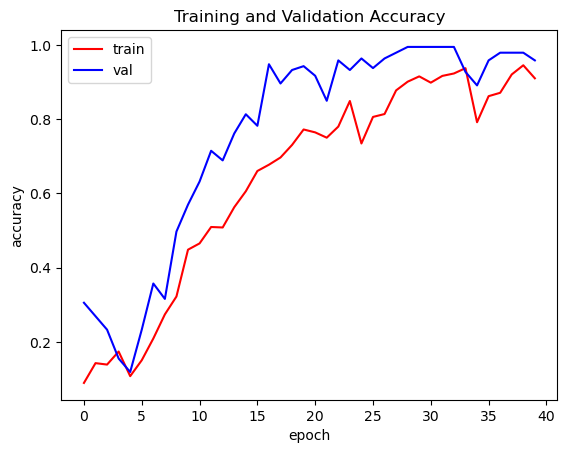

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

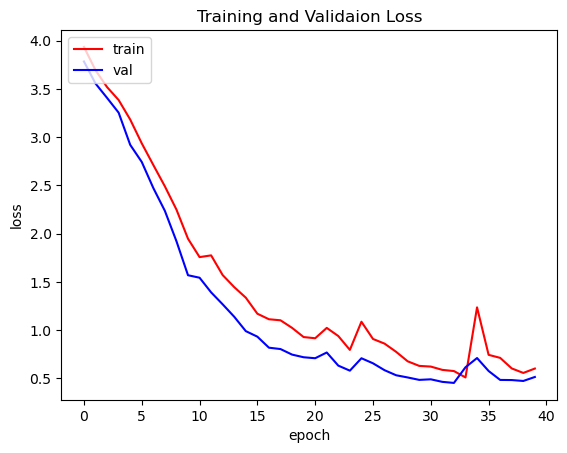

In [13]:
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred_probs = model.predict(X_test)

y_pred = np.argmax(y_pred_probs, axis=1)

if y_test.ndim > 1:
    y_test = np.argmax(y_test, axis=1)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step
[[ 4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  1  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  3  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [

In [15]:
import numpy as np

# Fungsi prediksi per teks
def predict_category_batch(texts):
    # Preprocessing: gunakan tokenizer dan padding yang sama seperti saat training
    sequences = tokenizer.texts_to_sequences(texts)
    padded = pad_sequences(sequences, maxlen=max_len, padding='post')
    
    # Prediksi model
    preds = model.predict(padded)
    
    # Ambil label yang diprediksi
    pred_indices = np.argmax(preds, axis=1)
    pred_labels = label_encoder.inverse_transform(pred_indices)
    
    return pred_labels

# Lakukan prediksi
predicted_labels = predict_category_batch(X_test_texts)

# Bandingkan dengan label asli
true_labels = label_encoder.inverse_transform(y_test_labels)

# Contoh evaluasi
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(true_labels, predicted_labels))
print("\nClassification Report:\n")
print(classification_report(true_labels, predicted_labels))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Accuracy: 0.9585492227979274

Classification Report:

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       0.83      1.00      0.91         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      0.20      0.33         5
             Data Science       1.00      1.00      1.00         8
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      0.62      0.77         8
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00

In [16]:
for i in range(5):  # Tampilkan 5 contoh
    print(f"Teks: {X_test_texts[i][:200]}...")
    print(f"Label Asli     : {true_labels[i]}")
    print(f"Label Prediksi : {predicted_labels[i]}")
    print("="*80)


Teks: education details january bachelor engineering extc mumbai maharashtra mumbai university january diploma industrial electronics vashi maharashtra fr agnel polytechnic etl developer etl developer skill...
Label Asli     : ETL Developer
Label Prediksi : ETL Developer
Teks: education details january p g sports science dr bmn college home science january bsc food science nutrition dr bmn college home science january hsc central railway jr college science commerce january ...
Label Asli     : Health and fitness
Label Prediksi : Health and fitness
Teks: education details november january llm masters law hyderabad telangana sultan ul uloom college law september may ba llb bachelors law hyderabad telangana osmania university pg college law advocate exp...
Label Asli     : Advocate
Label Prediksi : Advocate
Teks: social skills ability establish trust work team determined good work ethics ability work difficult situations education details january january mumbai maharashtra mumbai universi

In [17]:
contoh_teks = [
    "Experienced Python developer with 5+ years of experience in building scalable web applications using Django and Flask. Proficient in RESTful API design and PostgreSQL.",
    
    "HR specialist with a background in employee relations, recruitment, and organizational development. Skilled in conflict resolution and HRIS systems.",
    
    "Recent graduate in data science with hands-on experience in machine learning, data visualization, and statistical modeling using Python and R. Built predictive models on real-world datasets."
]

predictions = predict_category_batch(contoh_teks)

for teks, label in zip(contoh_teks, predictions):
    print("Teks:", teks[:100] + "...")
    print("Prediksi Kategori:", label)
    print("-" * 80)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Teks: Experienced Python developer with 5+ years of experience in building scalable web applications using...
Prediksi Kategori: Java Developer
--------------------------------------------------------------------------------
Teks: HR specialist with a background in employee relations, recruitment, and organizational development. ...
Prediksi Kategori: HR
--------------------------------------------------------------------------------
Teks: Recent graduate in data science with hands-on experience in machine learning, data visualization, an...
Prediksi Kategori: Advocate
--------------------------------------------------------------------------------
